# NLE Assignment 2: Distributional Semantics

In this assignment, you will be investigating the *distributional hypothesis*: **words which appear in similar contexts tend to have similar meanings**.

For assessment, you are expected to complete and submit this notebook file. When answers require code, you may import and use library functions (unless explicitly told otherwise). All of your own code should be included in the notebook rather than imported from elsewhere. Written answers should also be included in the notebook. You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers. If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data. In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell. Otherwise do not change the code in these cells.

In [1]:
candidateno=215758 #this MUST be updated to your candidate number so that you get a unique data sample

In [2]:
#set up drives for resources.  Change the path as necessary

from google.colab import drive
#mount google drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/My Drive/NLE Notebooks/resources/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#do not change the code in this cell
#preliminary imports

import re
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from itertools import zip_longest

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet_ic')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic
brown_ic = wn_ic.ic("ic-brown.dat")


from sussex_nltk.corpus_readers import ReutersCorpusReader

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!
Sussex NLTK root directory is /content/drive/My Drive/NLE Notebooks/resources


We are going to be using the Reuters corpus of financial documents for this assignment.  When you run the following cell you should see that it contains 1,113,359 sentences.

In [4]:
#do not change the code in this cell
rcr = ReutersCorpusReader().finance()
rcr.enumerate_sents()

1113359

The following cell will take 2-5 minutes to run.  It will generate a unique-to-you sample of 200,000 sentences.  These sentences are tokenised and normalised for case and number for you.

In [5]:
#do not change the code in this cell
def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist

random.seed(candidateno)  
samplesize=2000
iterations =100
sentences=[]
for i in range(0,iterations):
    sentences+=[normalise(sent) for sent in rcr.sample_sents(samplesize=samplesize)]
    print("Completed {}%".format(i))
print("Completed 100%")


Completed 0%
Completed 1%
Completed 2%
Completed 3%
Completed 4%
Completed 5%
Completed 6%
Completed 7%
Completed 8%
Completed 9%
Completed 10%
Completed 11%
Completed 12%
Completed 13%
Completed 14%
Completed 15%
Completed 16%
Completed 17%
Completed 18%
Completed 19%
Completed 20%
Completed 21%
Completed 22%
Completed 23%
Completed 24%
Completed 25%
Completed 26%
Completed 27%
Completed 28%
Completed 29%
Completed 30%
Completed 31%
Completed 32%
Completed 33%
Completed 34%
Completed 35%
Completed 36%
Completed 37%
Completed 38%
Completed 39%
Completed 40%
Completed 41%
Completed 42%
Completed 43%
Completed 44%
Completed 45%
Completed 46%
Completed 47%
Completed 48%
Completed 49%
Completed 50%
Completed 51%
Completed 52%
Completed 53%
Completed 54%
Completed 55%
Completed 56%
Completed 57%
Completed 58%
Completed 59%
Completed 60%
Completed 61%
Completed 62%
Completed 63%
Completed 64%
Completed 65%
Completed 66%
Completed 67%
Completed 68%
Completed 69%
Completed 70%
Completed 71%
Co

`generate_features()` will used in the first part of the assignment.

In [6]:
#do not change the code in this cell
def generate_features(sentences,window=1):
    mydict={}
    for sentence in sentences:
        for i,token in enumerate(sentence):
            current=mydict.get(token,{})
            features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
            for feature in features:
                current[feature]=current.get(feature,0)+1
            mydict[token]=current
    return mydict

1) Run `generate_features(sentences[:5])`. With reference to the code and the specific examples, explain how the output was generated [10 marks]

In [7]:
generate_features(sentences[:5])

{'$': {'NUM': 1},
 '&': {'exploration': 1, 'production': 1},
 "'s": {'belief': 1, 'credibility': 1, 'government': 1, 'turkey': 1},
 ',': {'isd': 1, 'texas': 1},
 '.': {'ago': 1, 'bill': 1, 'pension': 1, 'protect': 1},
 '8/26/97': {'go': 1},
 'NUM': {'$': 1, 'frenship': 1},
 'a': {'on': 1, 'second': 1, 'statement': 1, 'to': 2, 'voice': 1},
 'access': {'having': 1, 'to': 1},
 'agencies': {'credit': 1, 'to': 1},
 'ago': {'.': 1, 'weeks': 1},
 'ahead': {'lies': 1, 'way': 1},
 'also': {'apply': 1, 'should': 1},
 'amendment': {'same': 1, 'was': 1},
 'and': {'hours': 1, 'rest': 1},
 'announcing': {'begin': 1, 'in': 1},
 'apply': {'also': 1, 'to': 1},
 'basic': {'state': 1, 'the': 1},
 'be': {'the': 1, 'will': 1},
 'been': {'had': 1, 'restored': 1},
 'begin': {'announcing': 1, 'to': 1},
 'belief': {"'s": 1, 'that': 1},
 'bill': {'.': 1, 'spending': 1},
 'by': {'statement': 1, 'the': 1},
 'central': {'to': 1},
 'coalition': {'right-left': 1, 'two': 1},
 'coming': {'days': 1, 'the': 1},
 'commis

Overall, this algorithm is an implimented version of context windows to be used for capturing facets of meaning.

Shown in the output, it shows the features which were added per target word, the keys in the root dictionary are the target words and the item stored is a dictionary of feature words as keys and each key has the frequency of the times it has occured in the window.

On a fine grained analysis, The function makes a dictionary to store the data, it iterates through each sentance, and each of these iterations it also enumerates the sentance. Within this enumeration it gets the current tokens pre-existing dictionary to add to, or if it doesn't have ot it will just be empty. Next the algoritm gets the features within the window and then adds to the feature frequency and adds it to the root dictionary. This is repreated for every sentence in sentances then returned.

2) Write code and **find** the 1000 most frequently occurring words that
* are in your sample; AND
* have at least one noun sense according to WordNet [10 marks]

In [8]:
from nltk.probability import FreqDist
from nltk.corpus.reader.wordnet import WordNetError
import string

In [9]:
# 2
freq = FreqDist([word for sentence in sentences for word in sentence]) # Gets the frequency of each word used
freq_sorted = sorted(freq.items(), key=lambda x: x[1], reverse=True) # Sorts by the most occuring words
sorted_nouns = [word[0] for word in freq_sorted if len(wn.synsets(word[0], wn.NOUN)) is not 0] # Finds the words with a noun synset
first_one_thousand_nouns = sorted_nouns[:1000] # Gets the first 1000 of the sorted most occuring nouns

In [10]:
first_one_thousand_nouns

['in',
 'a',
 'percent',
 'it',
 'be',
 'pct',
 'at',
 'was',
 'he',
 'will',
 'as',
 'bank',
 'year',
 'have',
 'has',
 'are',
 'may',
 'million',
 'its',
 'government',
 'an',
 'billion',
 'tax',
 'uk',
 'trade',
 'rate',
 'budget',
 'more',
 'growth',
 'last',
 'first',
 'u.s.',
 'central',
 'price',
 'june',
 'market',
 'newsroom',
 'there',
 'over',
 'union',
 'or',
 'state',
 'inflation',
 'no',
 'one',
 'economy',
 'minister',
 'rates',
 'bonds',
 'prices',
 'currency',
 'april',
 'week',
 'i',
 'can',
 'interest',
 'deficit',
 'two',
 'gdp',
 'finance',
 'european',
 'july',
 'time',
 'wednesday',
 'years',
 'out',
 'tuesday',
 'march',
 'thursday',
 'current',
 'official',
 'apr',
 'who',
 'sales',
 'change',
 'policy',
 'index',
 'month',
 'total',
 'due',
 'fri',
 'mon',
 'balance',
 'investment',
 'three',
 'rise',
 'issue',
 'months',
 'international',
 'unemployment',
 'president',
 'monday',
 'friday',
 'capital',
 'public',
 'cut',
 'down',
 'consumer',
 'now',
 'countr

In [11]:
#do not change the code in this cell.  It relates to Q3
wordpair=("house","garden")
concept_1=wn.synsets(wordpair[0])[0]
concept_2=wn.synsets(wordpair[1])[0]
print("Path similarity between 1st sense of {} and 1st sense of {} is {}".format(wordpair[0],wordpair[1],wn.path_similarity(concept_1,concept_2)))
print("Resnik similarity between 1st sense of {} and 1st sense of {} is {}".format(wordpair[0],wordpair[1],wn.res_similarity(concept_1,concept_2, brown_ic)))
print("Lin similarity between 1st sense of {} and 1st sense of {} is {}".format(wordpair[0],wordpair[1],wn.lin_similarity(concept_1,concept_2, brown_ic)))

Path similarity between 1st sense of house and 1st sense of garden is 0.08333333333333333
Resnik similarity between 1st sense of house and 1st sense of garden is 1.2900256809649917
Lin similarity between 1st sense of house and 1st sense of garden is 0.15380807721262396


3)

Consider the code above which outputs the path similarity score, the Resnik similarity score and the Lin similarity score for a pair of concepts in WordNet.  Answer the following questions.

a) Explain what each of the numbers in the output means.

b) Write code to find the semantic similarity of a pair of words according to WordNet with a parameter to specify the measure of semantic similarity between concepts.  Explain and justify the strategy used for words which have multiple senses.

c) Choose one of the measures of semantic similarity and then for every possible pair of words identified in Q2, determine the semantic similarity of the pair according to WordNet.  Justify your choice of semantic similarity measure.

d) Identify the 10 most similar words (according to WordNet) to the most frequent word in the corpus [20 marks]

3a) 

Each score is a score for semantic similarity of two word senses, meaning how simular the words are to eachother.

The first number is the path similarity, this is the measurement of the distance in the WordNet hierarchy. The closer together two senses are, the more simular the words are. The score would be small if the distance is large and large if distance is small.

The second number, measures this score via the given the information content of the least common subsumer only, lowest common subsumer meaning the most specific concept which is an ancestor of both words, and information content is a measure of specificity for a concept.

The third number measures the score through expanding on the previous method by considering simularity through measuring the information content of lowest common subsumer **and** the two senses.

In [12]:
# 3b
def semantic_similarity_pair(word_one, word_two, measure_type="lin"):
  # Setup the vars to use, parts of speech is to get each synset type
  parts_of_speech = [wn.NOUN, wn.VERB, wn.ADJ, wn.ADV]
  max = 0 # The max simularity score found
  current = 0 # The current simularity score

  # Loops through each parts of speech, getting the words synset for that type
  for part in parts_of_speech:
    word_one_synset = wn.synsets(word_one, part) # Get the synset of word one with part of speech
    word_two_synset = wn.synsets(word_two, part) # Get the synset of word two with part of speech

    # If the sysnsets are not empty, loop through each combonation
    if word_one_synset and word_two_synset:
      for i in range(len(word_one_synset)):
        for j in range(len(word_two_synset)):
            # Due to a strange error when comparing said synset ( Particularly Synset('aforesaid.s.01') ) 
            # with itself causing an error, had to use try and except, I couldn't find documentation to fix this appropriately.
            try: 
              # Depending on what measure type is selected, it will find the score using that method.
              if measure_type is "path":
                current = wn.path_similarity(word_one_synset[i], word_two_synset[j])
              elif measure_type is "lch":
                current = wn.lch_similarity(word_one_synset[i], word_two_synset[j])
              elif measure_type is "wup":
                current = wn.wup_similarity(word_one_synset[i], word_two_synset[j])
              elif measure_type is "res":
                current = wn.res_similarity(word_one_synset[i], word_two_synset[j], brown_ic)
              elif measure_type is "jcn":
                current = wn.jcn_similarity(word_one_synset[i], word_two_synset[j], brown_ic)
              elif measure_type is "lin":
                current = wn.lin_similarity(word_one_synset[i], word_two_synset[j], brown_ic)
            except WordNetError:
              # If the wordnet error occurs, set current to 0
              current = 0

            # If the current is larger than the max so far
            if current > max:
              max = current
  return max # Return the max value

In [13]:
semantic_similarity_pair("help", "doctor", "jcn")

0.20431051449867704

I created a function which calculates the word similarity of two words which allows you to specify the measure.

The strategy I used is by creating synsets for each parts of speech for both words to mitigate comparison errors. After that I found every possibility of the synset senses and compare the simularities. There is then a running max value, each simularitiy gives a score, which would be set as thhe current, and then see if that is larger than the running max number, and if so set max as the current. The max simularity is then returned. 

!!! idk aaa !!!

In [14]:
# 3c
def bruteforce_first_one_thousand_nouns_semantic_simularity(nouns):
  results = []
  # Loops through each noun pairs, and find the Resnik simularity of them, and return the results
  for i in range(len(nouns)):
    for j in range(i+1,len(nouns)):
      results.append( (nouns[i], nouns[j], semantic_similarity_pair(nouns[i], nouns[j])) )
  
  return results

In [15]:
bruteforce_first_one_thousand_nouns_semantic_simularity(first_one_thousand_nouns)

[('in', 'a', 0.38755138887405405),
 ('in', 'percent', 0.2726351876459786),
 ('in', 'it', 1.1924584157955451e-300),
 ('in', 'be', 0.5965171994779592),
 ('in', 'pct', 0.2726351876459786),
 ('in', 'at', 9.731983135761224e-300),
 ('in', 'was', 0.6062080080943216),
 ('in', 'he', 0.44177124534852397),
 ('in', 'will', 0.07454755703185338),
 ('in', 'as', 0.38755138887405405),
 ('in', 'bank', 0.27230026089173215),
 ('in', 'year', 0.33229332305968123),
 ('in', 'have', 0.14607603581720022),
 ('in', 'has', 0.33213163679495317),
 ('in', 'are', 0.5588757369456027),
 ('in', 'may', 0.32662580758399484),
 ('in', 'million', 0.3996471400504192),
 ('in', 'its', 1.1924584157955451e-300),
 ('in', 'government', 0.07483579746095723),
 ('in', 'an', 1.1924584157955451e-300),
 ('in', 'billion', 0.37336457977483345),
 ('in', 'tax', 0.29266981311335283),
 ('in', 'uk', 0.4031089422448722),
 ('in', 'trade', 0.07627515191806303),
 ('in', 'rate', 0.30742798982086295),
 ('in', 'budget', 0.27350464680093994),
 ('in', 'm

I used Lin simularity as it is bounded beteen one and zero which makes it easier to measure if something is very simular or not because other simularities with no upper bound makes it difficult to determine the cap of how simular two words are. I also chose this due to the information content being taken account which gives a better educated score than just how close two words are in the WordNet heirarchy.

In [16]:
# 3d
# Get the frequencies of the words in sentences
def sentences_freqs(sentences):
  stop = stopwords.words('english')
  # Get the frequency distrabution of words in sentences and ignore stopwords, "NUM", and words which are not alpha
  freq = FreqDist([word for sentence in sentences for word in sentence if word is not "NUM" and word not in stop and word.isalpha()])
  freq_sorted = sorted(freq.items(), key=lambda x: x[1], reverse=True)
  return freq_sorted

# Get ten most highest similarity score from every word in sentences compared most freq word
def ten_most_sim_compared_most_freq_word(sentences):
  # Get the frequencies of the words in sentences
  freq_sorted = sentences_freqs(sentences)

  # Gets the words from the frequencies
  words = [word[0] for word in freq_sorted]
  most_freq_word = words[0]

  # Setup results for simularity
  simularity_results = []

  # Get the scores for each word compared to the most frequent word
  for i in range(len(words)):
    simularity_results.append( (most_freq_word, words[i], semantic_similarity_pair(most_freq_word, words[i])) )
  
  return sorted(simularity_results, key=lambda x: x[2], reverse=True)[:10]

In [17]:
ten_most_sim_compared_most_freq_word(sentences)

[('said', 'said', 1.0),
 ('said', 'state', 1.0),
 ('said', 'told', 1.0),
 ('said', 'states', 1.0),
 ('said', 'say', 1.0),
 ('said', 'says', 1.0),
 ('said', 'saying', 1.0),
 ('said', 'orders', 1.0),
 ('said', 'order', 1.0),
 ('said', 'reading', 1.0)]

4)

a) Write code to construct distributional vector representations of words in the corpus with a parameter to specify context size.  Explain how you calculate the value of association between each word and each context feature.

b) Use your code to construct representations of the 1000 words identified in Q2 with a window size of 1 

c) Use your representations to find the 10 words which are distributionally most similar to the most frequent word in the corpus. [15 marks]

In [18]:
# Import libraries
import math
import operator

In [19]:
# 4a
class word_vectors:
  def __init__(self,sentences,window=3):
    self.sentences=sentences
    self.window=window
    self.reps={}
    self.wordtotals={}
    self.feattotals={}
    self.generate_features()
    self.grandtotal=sum(self.wordtotals.values())
    self.convert_to_ppmi()

  # Get the dot product of two vectors
  def dot(self, vecA,vecB):
    the_sum=0
    for (key,value) in vecA.items():
      the_sum+=value*vecB.get(key,0)
    return the_sum

  # Generates the features for the sentances passed into the object
  def generate_features(self):
    # Loops through each sentence in the sentences
    for sentence in self.sentences:
      # Enumerates through the sentence, with i as a counter and token as the word
      for i,token in enumerate(sentence):
        current=self.reps.get(token,{}) # Gets the dictionary for the current word or creates a new one
        features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1] # Gets all the words within the window from the current word
        for feature in features: # Loops through each feature in the features
          current[feature]=current.get(feature,0)+1 # Counts the frequency of the feature around wherever the word occurs
          self.feattotals[feature]=self.feattotals.get(feature,0)+1 # Add to the frequency of all features
        self.wordtotals[token]=self.wordtotals.get(token,0)+len(features) # Counts the features of a word
        self.reps[token]=current # The dictionary stores a key, which is the value of the word, which stores the value of the word features

  # Gets the PPMI values, explained further in the written section
  def convert_to_ppmi(self):
    # The features are stored in a dictionary, with the PPMI as the value of the key, the key is the feature.
    # This dictionary is then stored in another dictionary with the key which is the value of the word
    self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
    
  # Get the cosine simularity of two words
  def similarity(self,word1,word2):
    rep1=self.ppmi.get(word1,{}) # Get the PPMIs for the first word
    rep2=self.ppmi.get(word2,{}) # Get the PPMIs fot the second word

    # Calculates the Cosine similarity of the words
    return self.dot(rep1,rep2)/(math.sqrt(self.dot(rep1,rep1)*self.dot(rep2,rep2)))

In [20]:
test = word_vectors(sentences)
test.convert_to_ppmi()

In [21]:
test.similarity('said', 'remarked')

0.012469296762311094

Positive pointwise mutual information value (PPMI) is used for the method of calculating the value of association between each word and each context feature. 

PPMI measures the amount of information gained by seeing a word and a feature together.

PPMI is calculated through this formula:
$$I(w, f) = \log { freq(f, w)  \times freq(*, *) \over freq(f, *)  \times freq(*, w) }$$

Where **w** is a word, and **f** is a feature.

In [22]:
word_vectors_first_one_thousand_nouns = word_vectors(sentences, window=1)
word_vectors_first_one_thousand_nouns.convert_to_ppmi()

In [23]:
# 4b
# Gets the representations of each noun and adds them to a dictionary with they key of the current noun
rep_dict_first_one_thousand_nouns = {}
for noun in first_one_thousand_nouns:
  rep_dict_first_one_thousand_nouns[noun] = word_vectors_first_one_thousand_nouns.reps[noun]

rep_dict_first_one_thousand_nouns

{'in': {'lies': 11,
  'people': 105,
  'announcing': 9,
  'the': 14142,
  'spokesman': 10,
  'situation': 72,
  'company': 33,
  'stadium': 15,
  'pittsburgh': 19,
  'investment': 321,
  'cambodia': 35,
  'established': 22,
  'line': 324,
  'confidence': 179,
  'inflation': 285,
  'june': 1016,
  'percent': 3075,
  'may': 1250,
  'said': 1610,
  'a': 3273,
  'increase': 624,
  'employment': 98,
  'them': 65,
  ',': 991,
  'new': 210,
  'friday': 38,
  'washington': 134,
  'standing': 15,
  'for': 50,
  'is': 283,
  'europe': 253,
  'pickup': 44,
  'claims': 27,
  'was': 233,
  'NUM': 4798,
  'level': 75,
  'two': 131,
  'gains': 46,
  'kenya': 23,
  'amount': 13,
  'differences': 26,
  'their': 230,
  '9,844': 2,
  'march': 1021,
  'growth': 754,
  'general': 63,
  'rise': 797,
  'energy': 10,
  'oil': 41,
  'london': 165,
  'that': 332,
  'employees': 41,
  'again': 53,
  'loans': 50,
  'be': 262,
  'bt': 3,
  'duty': 5,
  'month-on-month': 18,
  'change': 286,
  'israeli': 4,
  'gap'

In [24]:
# 4c
# Gets the most frequent word, and initialises the simularities list
most_freq_word = sentences_freqs(sentences)[0][0]
simularities=[]

# Goes through each noun finding the simularity between the most frequent word with each noun from Q2 
for noun in rep_dict_first_one_thousand_nouns.keys(): 
  simularities.append((most_freq_word, noun, word_vectors_first_one_thousand_nouns.similarity(most_freq_word, noun)))

# Sort the simularity scores by highest to lowest, then creates a slice of the first 10 results
sorted_simularities = sorted(simularities, key=lambda x: x[2], reverse=True)[:10]
sorted_simularities

[('said', 'says', 0.08621932666135654),
 ('said', 'economist', 0.07079082204244311),
 ('said', 'john', 0.06766681545689109),
 ('said', 'david', 0.06247130381659674),
 ('said', 'has', 0.05650434857164794),
 ('said', 'sees', 0.05640870073323934),
 ('said', 'was', 0.05563941183124059),
 ('said', 'spokesman', 0.05466977155008226),
 ('said', 'minister', 0.05320525997595005),
 ('said', 'chief', 0.04684778386220307)]

5) Plan and carry out an investigation into the correlation between semantic similarity according to WordNet and distributional similarity with different context window sizes. You should make sure that you include a graph of how correlation varies with context window size and that you discuss your results. [25 marks]

The investigation will be carried out by analysing the semantic simularity, using Lin, and distributional simularity, using word_vectors class with the simularity method, using different window sizes on pairs of words.

I will use the first one thousand nouns, and create pairs based on them to be used for the investigation.

I will use three differing window sizes, 5, 10 and 15.

With the data I will visualise it by using a scatter graph, and overlap the results at the end to try and see if differing window sizes are giving higher scores.

Using this I will try and find the correlation between the two simularities, and calculate the coefficients of the results to help with making a conclusion on the data.

In [25]:
# Checks if user wants to regenerate or import investigation data
from IPython.display import clear_output
option = input("[G]enerate or [I]mport\n\n").upper()
clear_output()
option

'I'

In [26]:
# Finds every pair in the words list and returns it as a list
def get_word_pairs(words):
  word_pairs = []
  for i in range(len(words)):
    for j in range(i + 1, len(words)):
      word_pairs.append( (words[i], words[j]) )
  
  return word_pairs

In [27]:
if option == "G":
  # Generates word pairs
  print("Getting Word Pairs...")
  word_pairs = get_word_pairs(first_one_thousand_nouns)
  print("Complete!")

In [28]:
if option == "G":
  # Generates Lin simularity scores for each word pair
  lin_results = []
  print("Calculating Lin Results...")
  for word_one, word_two in word_pairs:
    lin_results.append(semantic_similarity_pair(word_one, word_two)) 
  print("Completed!")

In [29]:
if option == "G":
  # Creates word vector objects with varying window size
  print("Creating Word Vector Objects...")
  word_vector_s = [word_vectors(sentences, window=5), word_vectors(sentences, window=10), word_vectors(sentences, window=15)]
  print("Complete!")

In [30]:
if option == "G":
  # Converts each word vector into PPMI similarities
  print("Converting Vectors to PPMI...")
  for word_vector in word_vector_s:
    word_vector.convert_to_ppmi()
  print("Completed!")

In [31]:
# Import libraries to split workload and make threads
import numpy as np
import concurrent.futures

In [32]:
# Generates the word vector simularities
def gen_word_vec(data):
  word_pairs = data[0]
  word_vector = data[1]

  results = []
  for word_one, word_two in word_pairs:
    results.append(word_vector.similarity(word_one, word_two))
    
  return results

# Used to handle threads for a particular word vectors class simularity
def handle_gen_word_vec_threads(data):
  threads = []
  total = []

  split_word_pairs = data[0]
  word_vector = data[1]

  # Splits the load across threads, and gets the values returned and add them all to one list
  with concurrent.futures.ThreadPoolExecutor() as executor:
    for i in range(len(split_word_pairs)):
      threads.append(executor.submit(gen_word_vec, (split_word_pairs[i], word_vector)))
    
    for i in range(len(split_word_pairs)):
      total += threads[i].result()

  # Return the list of all the combined results
  return total

In [33]:
# Generate data by using threading to make it faster
if option == "G":
  # Took 30 minutes to run :c
  # Splits the word pairs into 100 pairs to distrabute over threads
  split_word_pairs = [arr.tolist() for arr in np.array_split(word_pairs, 100)]

  # Sets up empty lists
  results = []
  threads = []

  print("Calculating Word Vector Simularities...")

  # Creates three seperate threads to handle each word vector similarity calculation
  with concurrent.futures.ThreadPoolExecutor() as executor:
    for i in range(len(word_vector_s)):
      threads.append(executor.submit(handle_gen_word_vec_threads, (split_word_pairs, word_vector_s[i])))

    print("Started Threads...")

    # Get the results returned from the threads
    for i in range(len(word_vector_s)):
      results.append(threads[i].result())

  # Sets the vars to be used for plots
  word_vector_one_results = results[0]
  word_vector_two_results = results[1]
  word_vector_three_results = results[2]

  print("Completed all!")

In [34]:
# Create a tuple to plot the graph
# Plots the lin simliarities against distributional similarity of each winddow size

if option == "G":
  word_vector_plots = []
  for i in range(len(word_pairs)):
    word_vector_plots.append( [word_vector_one_results[i], word_vector_two_results[i], word_vector_three_results[i], lin_results[i]] )

  # Create a dataframe with the tuple results
  df = pd.DataFrame(word_vector_plots, columns=["Window Size 5", "Window Size 10", "Window Size 15", "Lin Similarity"])

  # Export it so no need to rerun next time, use option I instead
  df_csv_data = df.to_csv("215758-NLEassignment2-5-data.csv")
  !cp 215758-NLEassignment2-5-data.csv "/content/drive/My Drive/NLE Notebooks/assessment/"

# If results were already generated
elif option == "I":
  df = pd.read_csv("/content/drive/My Drive/NLE Notebooks/assessment/215758-NLEassignment2-5-data.csv",  index_col=0)

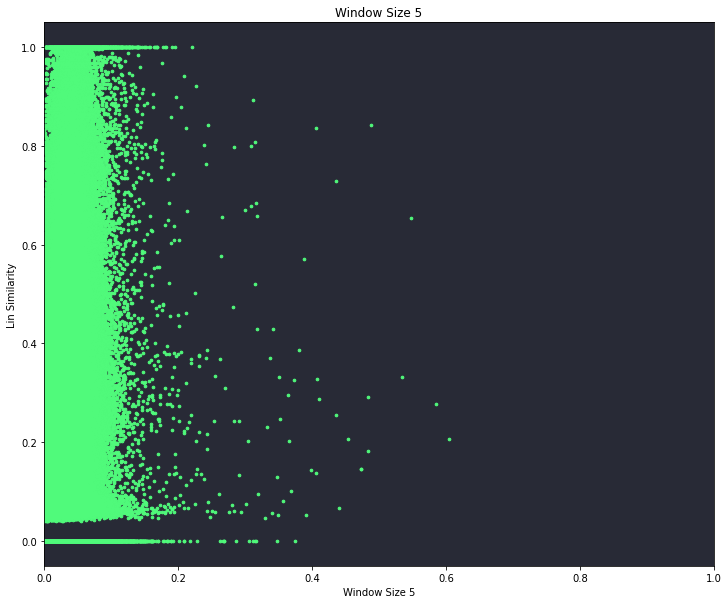

In [35]:
# Plot for window size 5
ax_window_size_one = df.plot.scatter(x="Window Size 5", y="Lin Similarity", title="Window Size 5", color="#50fa7b", s=7, xlim=(0,1.0), figsize=(12, 10))
ax_window_size_one.set_facecolor("#282a36")

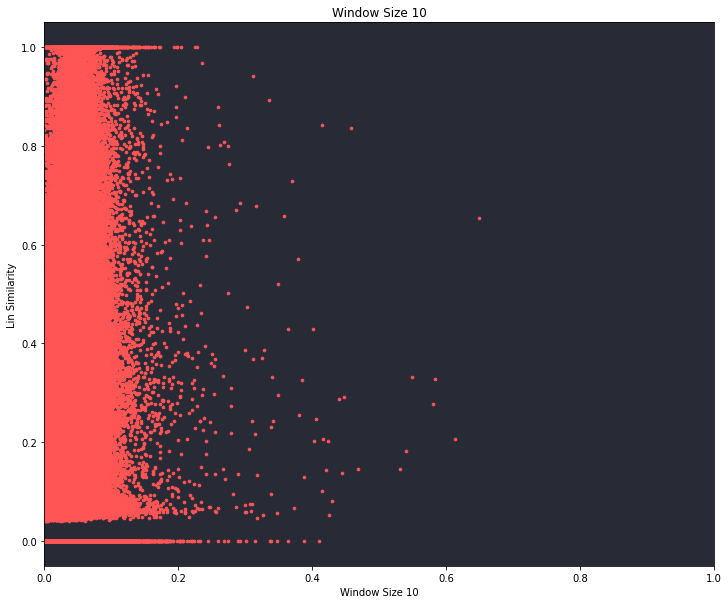

In [36]:
# Plot for window size 10
ax_window_size_two = df.plot.scatter(x="Window Size 10", y="Lin Similarity", title="Window Size 10", color="#ff5555", s=7, xlim=(0,1.0), figsize=(12, 10))
ax_window_size_two.set_facecolor("#282a36")

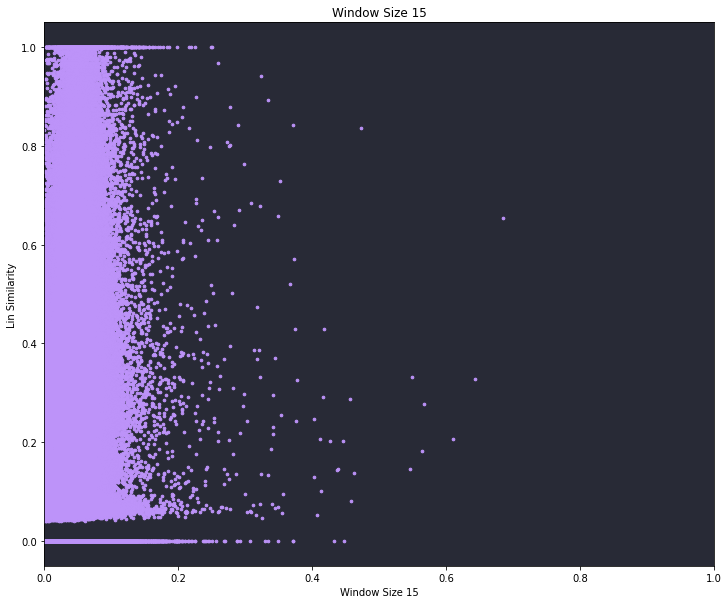

In [37]:
# Plot for window size 15
ax_window_size_three = df.plot.scatter(x="Window Size 15", y="Lin Similarity", title="Window Size 15", color="#bd93f9", s=7, xlim=(0,1), figsize=(12, 10))
ax_window_size_three.set_facecolor("#282a36")

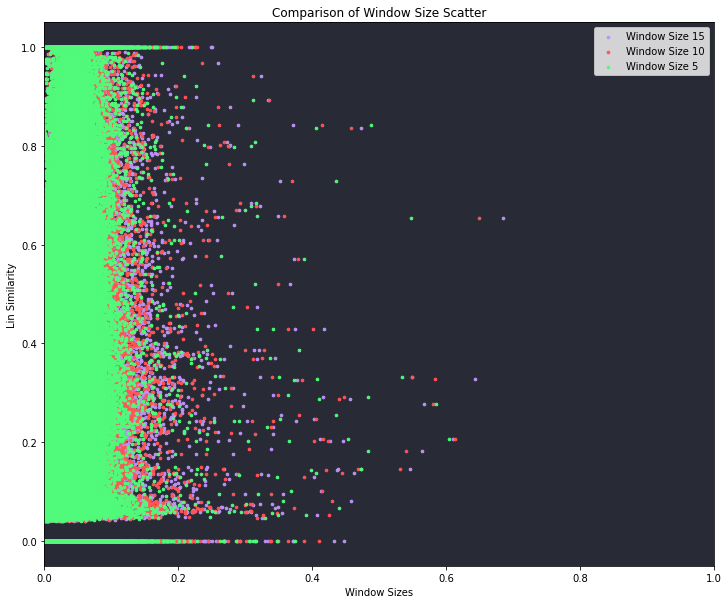

In [38]:
# Plots all the scatter graphs from above on eachother
ax_all_window_sizes = df.plot.scatter(x="Window Size 15", y="Lin Similarity", label="Window Size 15", color="#bd93f9", s=7, xlim=(0,1.0), figsize=(12, 10))
df.plot.scatter(x="Window Size 10", y="Lin Similarity", label="Window Size 10", color="#ff5555", ax=ax_all_window_sizes, s=7, xlim=(0,1.0), figsize=(12, 10))
df.plot.scatter(x="Window Size 5", y="Lin Similarity", label="Window Size 5", color="#50fa7b", ax=ax_all_window_sizes, s=7, xlim=(0,1.0), figsize=(12, 10))

# Adds appropriate labeling
ax_all_window_sizes.set_title("Comparison of Window Size Scatter")
ax_all_window_sizes.set_xlabel("Window Sizes")
ax_all_window_sizes.set_facecolor("#282a36")

ax_all_window_sizes

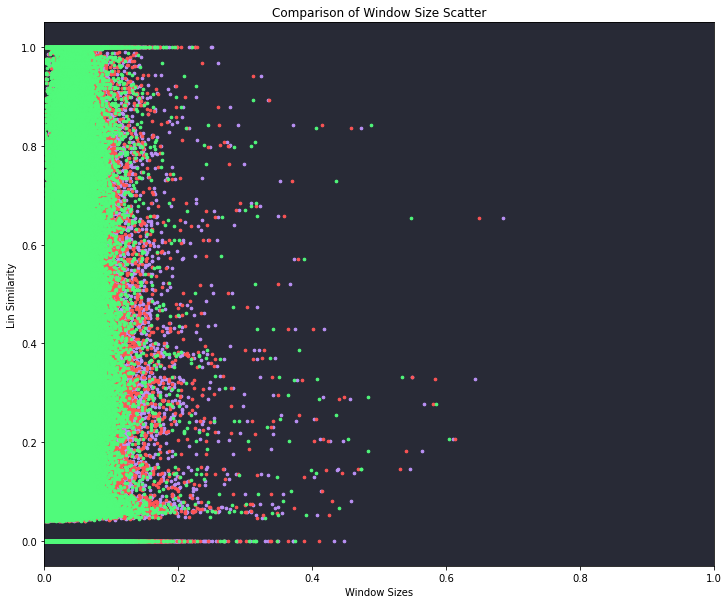

In [39]:
# Removes the legend
ax_all_window_sizes.get_legend().remove()
ax_all_window_sizes.figure 

In [40]:
# Calculates the pearson correlation of the dataframe
df.corr(method="pearson")

Window Size 5  Window Size 10  Window Size 15  Lin Similarity
Window Size 5        1.000000        0.946400        0.913588        0.155527
Window Size 10       0.946400        1.000000        0.980732        0.144556
Window Size 15       0.913588        0.980732        1.000000        0.138035
Lin Similarity       0.155527        0.144556        0.138035        1.000000

The graph shows that a window size of 5, 10 and 15 compared with the lin simularities of two words.

* Purple = Window size 15
* Red = Window size 10
* Green = Window size 5

The green graph window simular score is looks like the majority of results is lesser than red, which is lesser than purple. This shows that the word vectors simularity scores are lower with smaller window sizes on average.

There is a trend with all, where it is most dense with marks from 0 to 0.2 which then quickly disperses and stops around 0.7, this shows us that there is a weak correlation between the two measures.

The correlation coefficients decreases by 0.01 roughly the larger the window size for the lin similarity compared with window size which also shows there isn't much of a correlation between them.

Testing a larger set of words could help find a better correlation however it will take a long time to process due to the limitation of processing power. Possibly using a different measure for the semantic simularity or the word vectors simularity.

In [41]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 388

import io
from nbformat import current

filepath="/content/drive/My Drive/NLE Notebooks/assessment/215758-NLEassignment2.ipynb"
question_count=568

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

/usr/local/lib/python3.6/dist-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Submission length is 835
